In [137]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

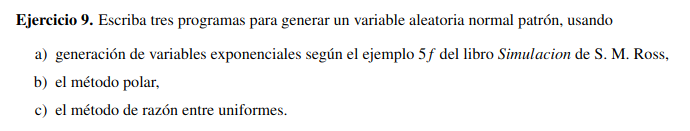

El ejemplo del libro lo que busca primero hacer es buscar generar una variable que sea el valor absoluto de una distribucion normal estandar. A partir del metodo de aceptacion y rechazo contra una exponencial de media 1. Y tenemos:

$$
\text{ABS de normal estandar :  } f(x) = \frac{2}{\sqrt{2\pi}}e^{-x^2/2} \\
\text{Exponencial de media 1 :  } g(x) = e^{-x} \\
\text{entonces para encontrar la cota para el rechazo hacemos :}\\
\frac{f(x)}{g(x)} = \sqrt(2\pi)e^{x-x^2/2} \text{ y el maximo de esto esta cuando x =1} \\
c = \sqrt{2\pi e} \quad \text{y luego :} \\
\frac{f(x)}{c g(x)} = \exp{-\frac{(x-1)^2}{2}} 
$$

Entonces en nuestro algoritmo vamos a 
- generar Y exponencial con media 1
- numero U aleatorio entre 0 y 1
- si U $\leq exp{-(Y-1)^2/2}$  enotnces X = Y.

notamos que en el 3er paso es lo mismo que hace $-\log(U) \leq (Y-1)^2/2$ y sabemos que $-\log(U)$ es una exponencial de media 1. Entonces el algoritmo se simplifica a

- generar Y1, Y2 exponenciales con media 1
- si $Y2 \geq (Y1-1)^2/2$ entonces X = Y1

In [138]:
def gen_exponencial (lamda):
    u = 1-rd.random()
    return -np.log(1-u)/lamda

In [139]:
def normal_estandar_ej():
    while True:
        y_1 = gen_exponencial(1)
        y_2 = gen_exponencial(1)
        if y_2 >= (y_1-1)**2/2:
            u = rd.random()
            if u <= 0.5:
                return y_1
            else:
                return -y_1

def normal_ej(mu, sigma):
    while True:
        y_1 = gen_exponencial(1)
        y_2 = gen_exponencial(1)
        if y_2 >= (y_1-1)**2/2:
            u = rd.random()
            if u <= 0.5:
                return y_1 * sigma + mu
            else:
                return -y_1 * sigma + mu


#### Metodo Polar

[Explicacion](../generar_VA_continuas.md#metodo-polar)

In [140]:
def MetodoPolar(mu, sigma):
    Rcuadrado = -2 * np.log(1 - rd.random())
    theta = 2 * np.pi * rd.random()
    X = Rcuadrado**(1/2) * np.cos(theta)
    Y = Rcuadrado**(1/2) * np.sin(theta)
    return X*sigma + mu #, Y*sigma + mu

MetodoPolar(1, 0)

1.0

### Razon entre uniformes
[Explicacion](../generar_VA_continuas.md#metodo-de-razon-entre-uniformes)

In [141]:
const = 4 * np.exp(-0.5) / np.sqrt(2.0)
def razon_uniformes(mu, sigma):
    while 1:
        u1 = rd.random()
        u2 = 1.0 - rd.random()
        z = const * (u1 - 0.5) / u2
        zz = z * z / 4.0
        if zz <= -np.log(u2):
            break
    return mu + z * sigma

Calculo la media muestral y la varianza muestral con 10.000 valores

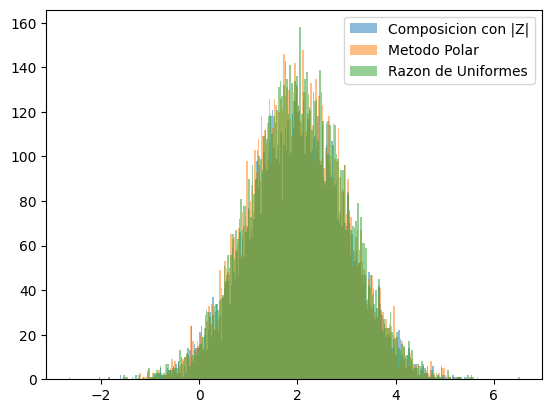

Esperanza estimada para composicion con |Z|: 2.002727787701299
Esperanza estimada para metodo polar: 1.9853033854685749
Esperanza estimada para razon de uniformes: 2.005176732079087
Varianza estimada para composicion con |Z|: 0.9863250574012733
Varianza estimada para metodo polar: 0.9952794205634318
Varianza estimada para razon de uniformes: 1.0123184871088364


In [158]:
val_ej = [normal_ej(mu=2, sigma=1) for _ in range(10000)]
val_polar = [MetodoPolar(2, 1) for _ in range(10000)]
val_ru = [razon_uniformes(2,1) for _ in range(10000)]

plt.hist(val_ej, bins=256, alpha=0.5, label='Composicion con |Z|')
plt.hist(val_polar, bins=256, alpha=0.5, label='Metodo Polar')
plt.hist(val_ru, bins=256, alpha=0.5, label='Razon de Uniformes')

plt.legend(loc='upper right')
plt.show()


# estimo esperanza
esp_ej = sum(val_ej) / len(val_ej)
esp_polar = sum(val_polar) / len(val_polar)
esp_ru = sum(val_ru) / len(val_ru)

print(f"Esperanza estimada para composicion con |Z|: {esp_ej}")
print(f"Esperanza estimada para metodo polar: {esp_polar}")
print(f"Esperanza estimada para razon de uniformes: {esp_ru}")

# estimo varianza
var_ej = sum([(x - esp_ej)**2 for x in val_ej]) / len(val_ej)
var_polar = sum([(x - esp_polar)**2 for x in val_polar]) / len(val_polar)
var_ru = sum([(x - esp_ru)**2 for x in val_ru]) / len(val_ru)
print("==========================")
print(f"Varianza estimada para composicion con |Z|: {var_ej}")
print(f"Varianza estimada para metodo polar: {var_polar}")
print(f"Varianza estimada para razon de uniformes: {var_ru}")